# DNN (2주차)

SEOYEON CHOI  
2022-09-14

기계학습 특강 (2주차) 9월14일 \[추천시스템, 텍스트분석, GAN\]

## imports

In [2]:
#
from fastai.collab import * ## 추천시스템
from fastai.text.all import * ## 텍스트분석 
from fastai.vision.all import *  ## GAN (이미지분석) 
from fastai.vision.gan import * ## GAN (이미지생성)

In [3]:
import pandas as pd

## 이미지 자료분석 실습 (지난시간 복습)

### 1단계: 데이터의 정리

In [4]:
path = untar_data(URLs.PETS)/'images'

In [5]:
path.ls()

(#7393) [Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/beagle_193.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Ragdoll_8.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/boxer_106.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/keeshond_56.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_162.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/pug_173.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_117.jpg')...]

**every files’ list**

In [6]:
fnames = get_image_files(path)

In [7]:
fnames

(#7390) [Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/beagle_193.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Ragdoll_8.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/boxer_106.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/keeshond_56.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_162.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/saint_bernard_136.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_76.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/pug_173.jpg'),Path('/home/csy/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_117.jpg')...]

**image files’ list**

In [8]:
ImageDataLoaders.from_name_func??

Signature: 
ImageDataLoaders . from_name_func ( 
 path , 
 fnames , 
 label_func , 
 valid_pct = 0.2 , 
 seed = None , 
 item_tfms = None , 
 batch_tfms = None , 
 bs = 64 , 
 val_bs = None , 
 shuffle = True , 
 device = None , 
 ) 
 Source: 
 @ classmethod
 def from_name_func ( cls , path , fnames , label_func , ** kwargs ) : 
 "Create from the name attrs of `fnames` in `path`s with `label_func`" 
 if sys . platform == 'win32' and isinstance ( label_func , types . LambdaType ) and label_func . __name__ == '<lambda>' : 
 # https://medium.com/@jwnx/multiprocessing-serialization-in-python-with-pickle-9844f6fa1812 
 raise ValueError ( "label_func couldn't be lambda function on Windows" ) 
 f = using_attr ( label_func , 'name' ) 
 return cls . from_path_func ( path , fnames , f , ** kwargs ) 
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/data.py
 Type: method

``` python
def f(fname):
    if fname[0].isupper():
        return 'cat'
    else:
        return 'dog'
```

``` python
f(x) = x+ 1
lambda x : x+1
```

In [14]:
fnames[0]

Path('/home/csy/.fastai/data/oxford-iiit-pet/images/Bombay_13.jpg')

In [10]:
f = lambda fname: 'cat' if fname[0].isupper() else 'dog'

In [9]:
f('s')

'dog'

In [10]:
f('D')

'cat'

``` python
dls = ImageDataLoaders.from_name_func(
    path, 
    fnames,
    lambda fname: 'cat' if fname[0].isupper() else 'dog'
    item_tfms=Resize(224)) 
```

In [12]:
dls = ImageDataLoaders.from_name_func(
    path, 
    fnames,
    f, # f대신 (lambda fname: 'cat' if fname[0].isupper() else 'dog') 를 넣어도 가능
    item_tfms=Resize(224)) # 사이즈가 달라서 통일

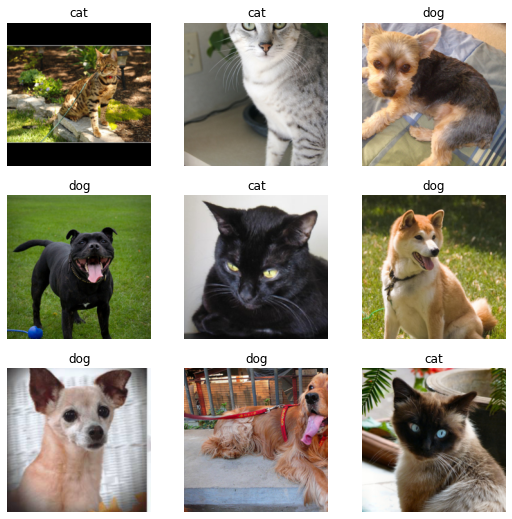

In [13]:
dls.show_batch()

### 2단계: lrnr 오브젝트 생성

In [14]:
cnn_learner??

Signature: 
cnn_learner ( 
 dls , 
 arch , 
 normalize = True , 
 n_out = None , 
 pretrained = True , 
 config = None , 
 loss_func = None , 
 opt_func = < function Adam at 0x7fcb70042550 > , 
 lr = 0.001 , 
 splitter = None , 
 cbs = None , 
 metrics = None , 
 path = None , 
 model_dir = 'models' , 
 wd = None , 
 wd_bn_bias = False , 
 train_bn = True , 
 moms = ( 0.95 , 0.85 , 0.95 ) , 
 cut = None , 
 n_in = 3 , 
 init = < function kaiming_normal_ at 0x7fcbc439a8b0 > , 
 custom_head = None , 
 concat_pool = True , 
 lin_ftrs = None , 
 ps = 0.5 , 
 first_bn = True , 
 bn_final = False , 
 lin_first = False , 
 y_range = None , 
 ) 
 Source: 
 @ delegates ( create_cnn_model ) 
 def cnn_learner ( dls , arch , normalize = True , n_out = None , pretrained = True , config = None , 
 # learner args 
 loss_func = None , opt_func = Adam , lr = defaults . lr , splitter = None , cbs = None , metrics = None , path = None , 
 model_dir = 'models' , wd = None , wd_bn_bias = False , train_bn = True , moms = ( 0.95 , 0.85 , 0.95 ) , 
 # other model args 
 ** kwargs ) : 
 "Build a convnet style learner from `dls` and `arch`" 
 if config : 
 warnings . warn ( 'config param is deprecated. Pass your args directly to cnn_learner.' ) 
 kwargs = { ** config , ** kwargs } 
 meta = model_meta . get ( arch , _default_meta ) 
 if normalize : _add_norm ( dls , meta , pretrained ) 
 if n_out is None : n_out = get_c ( dls ) 
 assert n_out , "`n_out` is not defined, and could not be inferred from data, set `dls.c` or pass `n_out`" 
 model = create_cnn_model ( arch , n_out , pretrained = pretrained , ** kwargs ) 
 splitter = ifnone ( splitter , meta [ 'split' ] ) 
 learn = Learner ( dls = dls , model = model , loss_func = loss_func , opt_func = opt_func , lr = lr , splitter = splitter , cbs = cbs , 
 metrics = metrics , path = path , model_dir = model_dir , wd = wd , wd_bn_bias = wd_bn_bias , train_bn = train_bn , 
 moms = moms ) 
 if pretrained : learn . freeze ( ) 
 # keep track of args for loggers 
 store_attr ( 'arch,normalize,n_out,pretrained' , self = learn , ** kwargs ) 
 return learn
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/learner.py
 Type: function

``` python
!cat ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/learner.py
```

이 코드로 존재하는 함수의 정의 확인 가능

어디 소속된 함수인지 확인 하기 위해

fastai에 소속된 cnn_leaner,따라서 fastai를 import해야 나타나지.

In [16]:
lrnr = cnn_learner(dls,resnet34,metrics=error_rate)

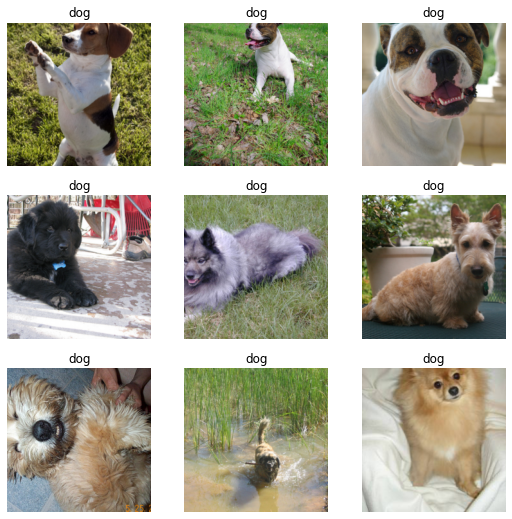

In [17]:
lrnr.dls.show_batch()

In [18]:
id(lrnr.dls)

140510181797744

In [19]:
id(dls)

140510181797744

주소가 같다. 같은 역할

lrnr에 dls가 소속되어 있다고 생각(?) - 포스트잇을 위에 덧붙인다 생각

### 3단계: lrnr.학습()

학습하는 fine_tune 이외에 여러가지 있음 - fine_tune 학습된 일부는
유지하고 바꿀 부분만 학습시키는 법: transfer learning

for exampel: cnn의 1d에서는 끝에만 학습

In [20]:
lrnr.fine_tune(1)

-   fine_tune()은 모든 가중치를 학습하는 것이 아니라 일부만 학습하는
    것임.
-   fine_tune()이외이 방법으로 학습할 수도 있음.

### 4단계: lrnr.예측()

(방법1) lrnr.predict() 함수를 이용

In [24]:
lrnr.predict('2022-09-07-dogs.jpeg') # 방법1-1
#lrnr.predict(PILImage.create('2022-09-07-dogs.jpeg')) # 방법1-2
#lrnr.predict(path.ls()[0]) # 방법1-3

('dog', TensorBase(1), TensorBase([2.2932e-05, 9.9998e-01]))

컴퓨터가 이해하기 쉬운 방법인 1-2번째 방법

In [25]:
lrnr.predict(PILImage.create('2022-09-07-dogs.jpeg'))

('dog', TensorBase(1), TensorBase([2.2932e-05, 9.9998e-01]))

In [27]:
lrnr.predict(path.ls()[1])

('dog', TensorBase(1), TensorBase([2.4945e-08, 1.0000e+00]))

------------------------------------------------------------------------

``` pyhton
dir(lrnr.model)
```

directory에 \_call_있으면 함수처럼 사용 가능

------------------------------------------------------------------------

(방법2) lrnr.model(X) 를 이용: X의 shape이 (?,3,224,224)의 형태의
텐서이어야함

In [28]:
type(dls.one_batch())

tuple

끝에 괄호로 묶여 있으면 tuple

In [29]:
X,y = dls.one_batch() # 방법2
lrnr.model(X[0:1]) 

TensorBase([[-8.3588,  7.0462]], device='cuda:0', grad_fn=<AliasBackward0>)

In [30]:
X[1].shape

torch.Size([3, 224, 224])

In [31]:
X[:2].shape

torch.Size([2, 3, 224, 224])

In [32]:
X.shape

torch.Size([64, 3, 224, 224])

image의 사이즈 224 \* 224 - 3개의 채널 - 64개 - image, 입력

In [33]:
y.shape

torch.Size([64])

-   예측값

In [34]:
y[:3]

TensorCategory([1, 1, 0], device='cuda:0')

``` python
lrnr.model(X[0])
```

오류 뜬다. - torch.Size(\[3, 224, 224\]) - shape을 - torch.Size(\[?, 3,
224, 224\]) - 이런 식으로 만들어주자, 입력

In [35]:
lrnr.model(X[:3])

TensorBase([[ -8.3605,   7.0472],
        [ -4.4236,   5.1110],
        [ 14.0977, -13.0582]], device='cuda:0', grad_fn=<AliasBackward0>)

In [36]:
lrnr.model(X)

TensorBase([[ -8.3595,   7.0465],
        [ -4.4246,   5.1111],
        [ 14.0959, -13.0577],
        [ -6.4868,   7.2289],
        [ -3.4974,   2.0202],
        [ -7.1135,   6.2276],
        [ -4.2407,   2.9429],
        [ -7.0260,   6.4789],
        [ -6.5011,   5.1029],
        [ -7.4927,   4.9038],
        [ -5.7292,   5.0113],
        [ -9.6244,   5.7399],
        [ -6.8247,   3.4742],
        [ 17.2742, -12.6829],
        [ -4.0548,   2.6589],
        [ 16.3894, -14.2360],
        [ -3.8864,   5.6632],
        [ -5.1192,   6.0355],
        [ 11.3016, -13.4798],
        [ -8.1850,   7.5925],
        [  8.3147,  -5.9946],
        [ -8.0415,   8.4349],
        [ -9.6461,   8.3790],
        [ -5.4923,   5.8070],
        [ 12.1504,  -9.3661],
        [ -7.7945,   6.7907],
        [ -5.0291,   3.4955],
        [ 13.8045, -11.3889],
        [ -4.5400,   5.1561],
        [ 16.5360, -13.3928],
        [ -4.0467,   3.3478],
        [ -5.8401,   7.2492],
        [  6.9878,  -4.8408],
      

$y$ : 왼쪽이 크면 0, 오른쪽이 크면 1 - 둘다 음수인 건 없네? - 왼쪽이
양수면 0 오른쪽이 양수면 1로 생각 가능하겠다.

## 프로그래밍 과정

### 프로그래밍 과정 overview

`-` overview

1.  `dls` 오브젝트 생성

2.  `lrnr` 오브젝트 생성

3.  `lrnr.학습()`

4.  `lrnr.예측()`

### 이미지분석, 추천시스템, 텍스트분석, GAN 분석과정 비교

`-` 비교

|       |        이미지분석(CNN)        |    추천시스템     |        텍스트분석        |        GAN        |
|:-------------:|:-------------:|:-------------:|:-------------:|:-------------:|
| 1단계 |       ImageDataLoaders        | CollabDataLoaders |     TextDataLoaders      | DataBlock -\> dls |
| 2단계 |         cnn_learner()         | collab_learner()  | language_model_learner() | GANLearner.wgan() |
| 3단계 |       lrnr.fine_tune(1)       |    lrnr.fit()     |        lrnr.fit()        |    lrnr.fit()     |
| 4단계 | lrnr.predict(), lrnr.model(X) |   lrnr.model(X)   |      lrnr.predict()      |                   |

## 추천시스템 실습

### 1단계

github에서 해당 파일의 raw click하여 주소 가져오기

``` python
!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_view.csv
```

위와 같이 wget사용하면 주소의 data 바로 다운 가능

In [4]:
df_view = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_view.csv')
df_view

100 rows × 20 columns

컴퓨터가 좋아하는 타입은 아님

-   row0 - row49 에 해당하는 유저는 커피를 선호
-   row50 - row99 에 해당하는 유저는 홍차를 선호

위의 자료는 비효율적, tidy data로 바꿔주자, 아래와 같이 정리함으로써
저장할 data도 줄어든다.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv')
df

1000 rows × 4 columns

-   컴퓨터는 이러한 형태를 더 분석하기 좋아한다.

``` python
!cat 파일명
```

data 도 확인 가능하다

``` python
!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv
```

``` python
!cat Real_estate_valuation_data_set.csv
```

------------------------------------------------------------------------

In [6]:
df.item.unique(),df.user.unique()
# 유저는 1~100 으로 아이템은 1~20으로 번호가 매겨져 있음 

(array([15,  1, 11,  5,  4, 14,  6, 20, 12, 17,  8,  9, 13, 19, 18, 16,  2,
         3, 10,  7]),
 array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100]))

item, user 번호 확인

------------------------------------------------------------------------

In [7]:
CollabDataLoaders.from_df??

Signature: 
CollabDataLoaders . from_df ( 
 ratings , 
 valid_pct = 0.2 , 
 user_name = None , 
 item_name = None , 
 rating_name = None , 
 seed = None , 
 path = '.' , 
 bs = 64 , 
 val_bs = None , 
 shuffle = True , 
 device = None , 
 ) 
 Source: 
 @ delegates ( DataLoaders . from_dblock ) 
 @ classmethod
 def from_df ( cls , ratings , valid_pct = 0.2 , user_name = None , item_name = None , rating_name = None , seed = None , path = '.' , ** kwargs ) : 
 "Create a `DataLoaders` suitable for collaborative filtering from `ratings`." 
 user_name = ifnone ( user_name , ratings . columns [ 0 ] ) 
 item_name = ifnone ( item_name , ratings . columns [ 1 ] ) 
 rating_name = ifnone ( rating_name , ratings . columns [ 2 ] ) 
 cat_names = [ user_name , item_name ] 
 splits = RandomSplitter ( valid_pct = valid_pct , seed = seed ) ( range_of ( ratings ) ) 
 to = TabularCollab ( ratings , [ Categorify ] , cat_names , y_names = [ rating_name ] , y_block = TransformBlock ( ) , splits = splits ) 
 return to . dataloaders ( path = path , ** kwargs ) 
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/collab.py
 Type: method

In [8]:
dls=CollabDataLoaders.from_df(df)

batch 데이터들의 group

In [9]:
dls.show_batch()

학습 전

In [10]:
X,y= dls.one_batch()

In [11]:
type(X)

torch.Tensor

In [12]:
type(y)

torch.Tensor

In [13]:
type(dls.one_batch())

tuple

In [14]:
X[0],y[0]

(tensor([74,  5]), tensor([1.0687]))

-   99번 user가 13번 아이템을 먹었을때 평점 4.3294

-   64번 유저가 15번 아이템을 먹었을때 평점을 4.1146 주었음

### 2단계

In [15]:
collab_learner??

Signature: 
collab_learner ( 
 dls , 
 n_factors = 50 , 
 use_nn = False , 
 emb_szs = None , 
 layers = None , 
 config = None , 
 y_range = None , 
 loss_func = None , 
 opt_func = < function Adam at 0x7f6f5cbebca0 > , 
 lr = 0.001 , 
 splitter = < function trainable_params at 0x7f6f7682d0d0 > , 
 cbs = None , 
 metrics = None , 
 path = None , 
 model_dir = 'models' , 
 wd = None , 
 wd_bn_bias = False , 
 train_bn = True , 
 moms = ( 0.95 , 0.85 , 0.95 ) , 
 ) 
 Source: 
 @ delegates ( Learner . __init__ ) 
 def collab_learner ( dls , n_factors = 50 , use_nn = False , emb_szs = None , layers = None , config = None , y_range = None , loss_func = None , ** kwargs ) : 
 "Create a Learner for collaborative filtering on `dls`." 
 emb_szs = get_emb_sz ( dls , ifnone ( emb_szs , { } ) ) 
 if loss_func is None : loss_func = MSELossFlat ( ) 
 if config is None : config = tabular_config ( ) 
 if y_range is not None : config [ 'y_range' ] = y_range
 if layers is None : layers = [ n_factors ] 
 if use_nn : model = EmbeddingNN ( emb_szs = emb_szs , layers = layers , ** config ) 
 else : model = EmbeddingDotBias . from_classes ( n_factors , dls . classes , y_range = y_range ) 
 return Learner ( dls , model , loss_func = loss_func , ** kwargs ) 
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/collab.py
 Type: function

In [16]:
lrnr = collab_learner(dls,y_range=(0,5)) # y_range는 평점의 범위

y는 평점이니까 0~5까지의 범위를 넣어주자

### 3단계

In [17]:
lrnr.fit(30) # 총 30번 정도 해야 적합이 잘된다. 

loss가 2.3에서 0.47으로 떨어지는 모습

### 4단계

`-` 이미 있는 데이터를 예측

`-` 하나의 배치 전체를 예측

``` python
lrnr.model(X)
```

만 넣으면 에러뜬다.

In [18]:
!nvidia-smi

Tue Sep 20 23:48:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 495.46       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:65:00.0 Off |                  N/A |
| 30%   51C    P2   130W / 420W |  12684MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

GPU 확인 가능

GPU아님 CPU로 올리자

In [19]:
yhat=lrnr.model(X.to("cuda:0"))
yhat

tensor([1.0097, 3.9209, 4.0095, 1.0768, 1.0179, 3.9701, 1.0862, 4.0802, 4.0528,
        1.0718, 3.9230, 0.9994, 0.9662, 0.9122, 0.9745, 4.0083, 0.9989, 4.1045,
        4.1632, 4.0724, 3.9754, 0.9565, 4.0757, 4.0317, 4.0740, 1.0779, 3.9354,
        0.9951, 3.9031, 1.0241, 4.0253, 4.0965, 4.0368, 4.0944, 1.0856, 4.1450,
        4.0549, 4.0072, 0.8689, 4.0659, 3.9192, 3.9501, 4.0449, 0.9437, 1.0582,
        0.9584, 4.0409, 4.0453, 1.0675, 0.9406, 1.0740, 0.9307, 0.9885, 3.9951,
        3.9118, 4.1501, 0.8893, 0.8946, 3.9687, 1.0579, 4.1036, 3.9685, 1.0809,
        1.0768], device='cuda:0', grad_fn=<AddBackward0>)

In [20]:
y.reshape(-1)

tensor([1.0687, 3.8248, 3.8609, 1.0261, 0.8480, 4.4577, 1.1617, 4.3921, 4.2632,
        0.7725, 4.0136, 1.2705, 0.8435, 1.0225, 0.8010, 4.1617, 1.0468, 4.1678,
        4.5026, 4.0560, 3.8630, 0.9917, 4.0591, 3.7022, 4.1746, 1.3469, 3.7943,
        1.0213, 3.7841, 0.8235, 4.0407, 3.9853, 4.1260, 4.1900, 1.0309, 4.1798,
        3.9636, 3.7450, 0.6707, 4.0318, 4.1648, 4.1057, 3.9359, 0.7864, 1.2067,
        0.8126, 4.0661, 4.1786, 1.3155, 0.9504, 1.1084, 0.8396, 0.8503, 4.0655,
        3.8489, 4.0402, 0.7891, 0.9279, 4.1935, 0.9436, 4.4777, 4.0123, 1.0577,
        0.8246])

-   lrnr.model()은 GPU메모리에 존재하고 X는 일반메모리에 존재하므로 X를
    GPU메모리로 옮겨주어야 함
-   X.to(“cuda:0”)을 통하여 X를 GPU메모리로 옮기는 작업을 수행할 수
    있다.

`-` 하나의 유저가 하나의 아이템을 선택했다고 가정하고 예측 (주어진
자료중에서 예측)

In [21]:
X.shape

torch.Size([64, 2])

In [22]:
X[0:1]

tensor([[74,  5]])

`-` 1번 user가 커피2 마셨을때 - 예상: 4점 근처

In [23]:
lrnr.model(X[0:1].to("cuda:0"))

tensor([1.0097], device='cuda:0', grad_fn=<AddBackward0>)

In [24]:
lrnr.model(tensor([[1,2]]).to("cuda:0"))

tensor([3.9337], device='cuda:0', grad_fn=<AddBackward0>)

-   18번 유저가 5번 아이템(커피)를 먹는다면?

In [25]:
lrnr.model(X[0:1].to("cuda:0"))

tensor([1.0097], device='cuda:0', grad_fn=<AddBackward0>)

-   평점은 4.1128정도 될것

`-` 하나의 유저가 하나의 아이템을 선택했다고 가정하고 예측 (주어지지
않은 자료중에서 예측)

In [26]:
X[0:1]

tensor([[74,  5]])

In [27]:
Xnew = torch.tensor([[1,  2]])

In [28]:
lrnr.model(Xnew.to("cuda:0"))

tensor([3.9337], device='cuda:0', grad_fn=<AddBackward0>)

## 텍스트분석 실습

timeseries 와 text 순서가 중요! - 가장 잘 응용할 수 있는 게
chatbot챗봇 - 나는 $\to$ 학교에 $\to$ 갔다.

timeseries는 뒤를 정확히 맞춰야 하지만, text는 그렇지 않..?

### 1단계

In [67]:
df = pd.DataFrame({'text':['h e l l o . h e l l o ! h e l l o ? h e l l o !! h e l l o ??']*20000})
df

20000 rows × 1 columns

In [68]:
TextDataLoaders.from_df??

Signature: 
TextDataLoaders . from_df ( 
 df , 
 path = '.' , 
 valid_pct = 0.2 , 
 seed = None , 
 text_col = 0 , 
 label_col = 1 , 
 label_delim = None , 
 y_block = None , 
 text_vocab = None , 
 is_lm = False , 
 valid_col = None , 
 tok_tfm = None , 
 tok_text_col = 'text' , 
 seq_len = 72 , 
 backwards = False , 
 bs = 64 , 
 val_bs = None , 
 shuffle = True , 
 device = None , 
 ) 
 Source: 
 @ classmethod
 @ delegates ( DataLoaders . from_dblock ) 
 def from_df ( cls , df , path = '.' , valid_pct = 0.2 , seed = None , text_col = 0 , label_col = 1 , label_delim = None , y_block = None , 
 text_vocab = None , is_lm = False , valid_col = None , tok_tfm = None , tok_text_col = "text" , seq_len = 72 , backwards = False , ** kwargs ) : 
 "Create from `df` in `path` with `valid_pct`" 
 blocks = [ TextBlock . from_df ( text_col , text_vocab , is_lm , seq_len , backwards , tok = tok_tfm ) ] 
 if y_block is None and not is_lm : 
 blocks . append ( MultiCategoryBlock if is_listy ( label_col ) and len ( label_col ) > 1 else CategoryBlock ) 
 if y_block is not None and not is_lm : blocks += ( y_block if is_listy ( y_block ) else [ y_block ] ) 
 splitter = RandomSplitter ( valid_pct , seed = seed ) if valid_col is None else ColSplitter ( valid_col ) 
 dblock = DataBlock ( blocks = blocks , 
 get_x = ColReader ( tok_text_col ) , 
 get_y = None if is_lm else ColReader ( label_col , label_delim = label_delim ) , 
 splitter = splitter ) 
 return cls . from_dblock ( dblock , df , path = path , seq_len = seq_len , ** kwargs ) 
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/text/data.py
 Type: method

``` python
is_lm = False
```

다음 자료를 예측하고 싶을때

``` python
is_lm = True
```

-   classification을 수행하고 싶을 때

-   생성에 목적

-   is_lm: text의 생성에 관심이 있다면 True로 설정할 것

In [69]:
dls = TextDataLoaders.from_df(df,text_col='text',is_lm=True) 

In [70]:
dls.show_batch()

위의 결과에서 **xxbos**는 하나의 내용이 끝나고 다른 내용이 시작된다는
의미

### 2단계

In [71]:
language_model_learner??

Signature: 
language_model_learner ( 
 dls , 
 arch , 
 config = None , 
 drop_mult = 1.0 , 
 backwards = False , 
 pretrained = True , 
 pretrained_fnames = None , 
 loss_func = None , 
 opt_func = < function Adam at 0x7fcb70042550 > , 
 lr = 0.001 , 
 splitter = < function trainable_params at 0x7fcb79d04940 > , 
 cbs = None , 
 metrics = None , 
 path = None , 
 model_dir = 'models' , 
 wd = None , 
 wd_bn_bias = False , 
 train_bn = True , 
 moms = ( 0.95 , 0.85 , 0.95 ) , 
 ) 
 Source: 
 @ delegates ( Learner . __init__ ) 
 def language_model_learner ( dls , arch , config = None , drop_mult = 1. , backwards = False , pretrained = True , pretrained_fnames = None , ** kwargs ) : 
 "Create a `Learner` with a language model from `dls` and `arch`." 
 vocab = _get_text_vocab ( dls ) 
 model = get_language_model ( arch , len ( vocab ) , config = config , drop_mult = drop_mult ) 
 meta = _model_meta [ arch ] 
 learn = LMLearner ( dls , model , loss_func = CrossEntropyLossFlat ( ) , splitter = meta [ 'split_lm' ] , ** kwargs ) 
 url = 'url_bwd' if backwards else 'url' 
 if pretrained or pretrained_fnames : 
 if pretrained_fnames is not None : 
 fnames = [ learn . path / learn . model_dir / f'{fn}.{ext}' for fn , ext in zip ( pretrained_fnames , [ 'pth' , 'pkl' ] ) ] 
 else : 
 if url not in meta : 
 warn ( "There are no pretrained weights for that architecture yet!" ) 
 return learn
 model_path = untar_data ( meta [ url ] , c_key = 'model' ) 
 try : fnames = [ list ( model_path . glob ( f'*.{ext}' ) ) [ 0 ] for ext in [ 'pth' , 'pkl' ] ] 
 except IndexError : print ( f'The model in {model_path} is incomplete, download again' ) ; raise 
 learn = learn . load_pretrained ( * fnames ) 
 return learn
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/text/learner.py
 Type: function

In [72]:
lrnr = language_model_learner(dls, AWD_LSTM)

### 3단계

In [73]:
lrnr.fit(5)

### 4단계

In [74]:
lrnr.predict('h e',n_words=30)

'h e l l o ? h e l l o ! h e l l o ! h e l l o ! h e l l o ? ?'

## GAN intro

`-` 저자: 이안굿펠로우 (이름이 특이함. 좋은친구..) - 천재임 - 지도교수가
요수아 벤지오

`-` 논문 NIPS, 저는 이 논문 읽고 소름돋았어요.. -
https://arxiv.org/abs/1406.2661 (현재시점, 38751회 인용되었음 $\to$
48978회 인용..)

`-` 최근 10년간 머신러닝 분야에서 가장 혁신적인 아이디어이다. (얀르쿤,
2014년 시점..)

`-` 무슨내용? 생성모형

### 생성모형이란? (쉬운 설명)

> 만들수 없다면 이해하지 못한 것이다, 리처드 파인만 (천재 물리학자)

`-` 사진속에 들어있는 동물이 개인지 고양이인지 맞출수 있는 기계와 개와
고양이를 그릴수 있는 기계중 어떤것이 더 시각적보에 대한 이해가 깊다고
볼수 있는가?

`-` 진정으로 인공지능이 이미지를 이해했다면, 이미지를 만들수도 있어야
한다. $\to$ 이미지를 생성하는 모형을 만들어보자 $\to$ 성공

![](https://upload.wikimedia.org/wikipedia/commons/1/1f/Woman_1.jpg)

#### GAN의 응용분야

`-` 내가 찍은 사진이 피카소의 화풍으로 표현된다면? -
https://www.lgsl.kr/sto/stories/60/ALMA2020070001

`-` 퀸의 라이브에이드가 4k로 나온다면?

`-` 1920년대 서울의 모습이 칼라로 복원된다면?

`-` 딥페이크: 유명인의 가짜 포르노, 가짜뉴스, 협박(거짓기소)

`-` 게임영상 (파이널판타지)

`-` 거북이의 커버..

`-` 너무 많아요…..

### 생성모형이란? 통계학과 버전의 설명

> 제한된 정보만으로 어떤 문제를 풀 때, 그 과정에서 원래의 문제보다
> 일반적인 문제를 풀지 말고, 가능한 원래의 문제를 직접 풀어야한다.
> 배프닉 (SVM 창시자)

`-` 이미지 $\boldsymbol{x}$가 주어졌을 경우 라벨을 $y$라고 하자.

`-` 이미지를 보고 라벨을 맞추는 일은 $p(y| \boldsymbol{x})$에 관심이
있다.

`-` 이미지를 생성하는 일은 $p(\boldsymbol{x},y)$에 관심이 있는것이다.

y의 평균적인 확률이 나올떄 x로 y 를 예측할 수 있다고 한단

`-` 데이터의 생성확률 $p(\boldsymbol{x},y)$을 알면 클래스의 사후확률
$p(y|\boldsymbol{x})$를 알 수 있음. (아래의 수식 참고) 하지만 역은
불가능

$$p(y|x) = \frac{p(x,y)}{p(x)} = \frac{p(x,y)}{\sum_{y}p(x,y)} $$

-   즉 이미지를 생성하는일은 분류문제보다 더 어려운 일이라 해석가능

분류할 수 았다는게 생성할 수 있다는 건 아니니까

`-` 따라서 배프닉의 원리에 의하면 식별적 분류가 생성적 분류보다 바람직한
접근법이라 할 수 있음.

`-` 하지만 다양한 현실문제에서 생성모형이 유용할때가 많다.

### GAN의 원리

`-` GAN은 생성모형중 하나임

`-` GAN의 원리는 경찰과 위조지폐범이 서로 선의의(?) 경쟁을 통하여 서로
발전하는 모형으로 설명할 수 있다.

> The generative model can be thought of as analogous to a team of
> counterfeiters, trying to produce fake currency and use it without
> detection, while the discriminative model is analogous to the police,
> trying to detect the counterfeit currency. Competition in this game
> drives both teams to improve their methods until the counterfeits are
> indistiguishable from the genuine articles.

`-` 서로 적대적인(adversarial) 네트워크(network)를 동시에 학습시켜
가짜이미지를 만든다(generate)

`-` 무식한 상황극..

> 위조범: 가짜돈을 만들어서 부자가 되어야지! (가짜돈을 그림)

> 경찰: (위조범이 만든 돈을 보고) 이건 가짜다!

> 위조범: 걸렸군.. 더 정교하게 만들어야지..

> 경찰: 이건 진짠가?… –\> 상사에게 혼남. 그것도 구분못하냐고

> 위조범: 더 정교하게 만들자..

> 경찰: 더 판별능력을 업그레이드 하자!

> 반복..

`-` 굉장히 우수한 경찰조차도 진짜와 가짜를 구분하지 못할때(=진짜
이미지를 0.5의 확률로만 진짜라고 말할때 = 가짜 이미지를 0.5의 확률로만
가짜라고 말할때) 학습을 멈춘다.

## GAN 실습

### 1단계

In [75]:
path = untar_data(URLs.MNIST_SAMPLE)

In [78]:
DataBlock??

Init signature: 
DataBlock ( 
 blocks = None , 
 dl_type = None , 
 getters = None , 
 n_inp = None , 
 item_tfms = None , 
 batch_tfms = None , 
 * , 
 get_items = None , 
 splitter = None , 
 get_y = None , 
 get_x = None , 
 ) 
 Source: 
 class DataBlock ( ) : 
 "Generic container to quickly build `Datasets` and `DataLoaders`" 
 get_x = get_items = splitter = get_y = None 
 blocks , dl_type = ( TransformBlock , TransformBlock ) , TfmdDL
 _methods = 'get_items splitter get_y get_x' . split ( ) 
 _msg = "If you wanted to compose several transforms in your getter don't forget to wrap them in a `Pipeline`." 
 def __init__ ( self , blocks = None , dl_type = None , getters = None , n_inp = None , item_tfms = None , batch_tfms = None , ** kwargs ) : 
 blocks = L ( self . blocks if blocks is None else blocks ) 
 blocks = L ( b ( ) if callable ( b ) else b for b in blocks ) 
 self . type_tfms = blocks . attrgot ( 'type_tfms' , L ( ) ) 
 self . default_item_tfms = _merge_tfms ( * blocks . attrgot ( 'item_tfms' , L ( ) ) ) 
 self . default_batch_tfms = _merge_tfms ( * blocks . attrgot ( 'batch_tfms' , L ( ) ) ) 
 for b in blocks : 
 if getattr ( b , 'dl_type' , None ) is not None : self . dl_type = b . dl_type
 if dl_type is not None : self . dl_type = dl_type
 self . dataloaders = delegates ( self . dl_type . __init__ ) ( self . dataloaders ) 
 self . dls_kwargs = merge ( * blocks . attrgot ( 'dls_kwargs' , { } ) ) 
 self . n_inp = ifnone ( n_inp , max ( 1 , len ( blocks ) - 1 ) ) 
 self . getters = ifnone ( getters , [ noop ] * len ( self . type_tfms ) ) 
 if self . get_x : 
 if len ( L ( self . get_x ) ) != self . n_inp : 
 raise ValueError ( f'get_x contains {len(L(self.get_x))} functions, but must contain {self.n_inp} (one for each input)\n{self._msg}' ) 
 self . getters [ : self . n_inp ] = L ( self . get_x ) 
 if self . get_y : 
 n_targs = len ( self . getters ) - self . n_inp
 if len ( L ( self . get_y ) ) != n_targs : 
 raise ValueError ( f'get_y contains {len(L(self.get_y))} functions, but must contain {n_targs} (one for each target)\n{self._msg}' ) 
 self . getters [ self . n_inp : ] = L ( self . get_y ) 
 if kwargs : raise TypeError ( f'invalid keyword arguments: {", ".join(kwargs.keys())}' ) 
 self . new ( item_tfms , batch_tfms ) 
 def _combine_type_tfms ( self ) : return L ( [ self . getters , self . type_tfms ] ) . map_zip ( 
 lambda g , tt : ( g . fs if isinstance ( g , Pipeline ) else L ( g ) ) + tt ) 
 def new ( self , item_tfms = None , batch_tfms = None ) : 
 self . item_tfms = _merge_tfms ( self . default_item_tfms , item_tfms ) 
 self . batch_tfms = _merge_tfms ( self . default_batch_tfms , batch_tfms ) 
 return self
 @ classmethod
 def from_columns ( cls , blocks = None , getters = None , get_items = None , ** kwargs ) : 
 if getters is None : getters = L ( ItemGetter ( i ) for i in range ( 2 if blocks is None else len ( L ( blocks ) ) ) ) 
 get_items = _zip if get_items is None else compose ( get_items , _zip ) 
 return cls ( blocks = blocks , getters = getters , get_items = get_items , ** kwargs ) 
 def datasets ( self , source , verbose = False ) : 
 self . source = source ; pv ( f"Collecting items from {source}" , verbose ) 
 items = ( self . get_items or noop ) ( source ) ; pv ( f"Found {len(items)} items" , verbose ) 
 splits = ( self . splitter or RandomSplitter ( ) ) ( items ) 
 pv ( f"{len(splits)} datasets of sizes {','.join([str(len(s)) for s in splits])}" , verbose ) 
 return Datasets ( items , tfms = self . _combine_type_tfms ( ) , splits = splits , dl_type = self . dl_type , n_inp = self . n_inp , verbose = verbose ) 
 def dataloaders ( self , source , path = '.' , verbose = False , ** kwargs ) : 
 dsets = self . datasets ( source , verbose = verbose ) 
 kwargs = { ** self . dls_kwargs , ** kwargs , 'verbose' : verbose } 
 return dsets . dataloaders ( path = path , after_item = self . item_tfms , after_batch = self . batch_tfms , ** kwargs ) 
 _docs = dict ( new = "Create a new `DataBlock` with ot

In [82]:
TransformBlock

fastai.data.block.TransformBlock

In [83]:
ImageBlock

<function fastai.vision.data.ImageBlock(cls=<class 'fastai.vision.core.PILImage'>)>

In [84]:
generate_noise

<function fastai.vision.gan.generate_noise(fn, size=100)>

In [79]:
dblock = DataBlock(blocks=(TransformBlock,ImageBlock),
          get_x = generate_noise,
          get_items=get_image_files,
          item_tfms=Resize(32))
dls = dblock.dataloaders(path) 

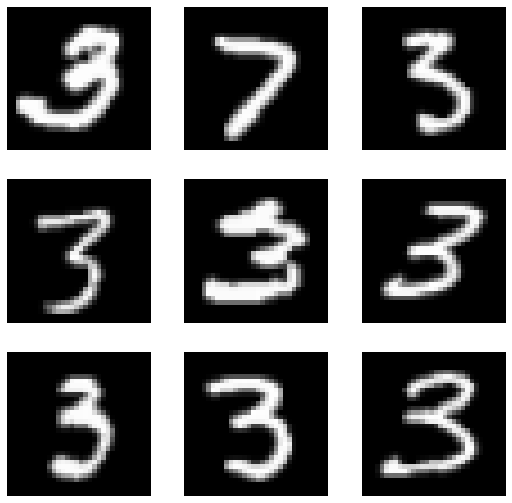

In [80]:
dls.show_batch()

### 2단계

In [86]:
basic_generator??

Signature: 
basic_generator ( 
 out_size , 
 n_channels , 
 in_sz = 100 , 
 n_features = 64 , 
 n_extra_layers = 0 , 
 ks = 3 , 
 stride = 1 , 
 padding = None , 
 bias = None , 
 ndim = 2 , 
 norm_type = < NormType . Batch : 1 > , 
 bn_1st = True , 
 act_cls = < class 'torch.nn.modules.activation.ReLU' > , 
 transpose = False , 
 init = 'auto' , 
 xtra = None , 
 bias_std = 0.01 , 
 dilation : Union [ int , Tuple [ int , int ] ] = 1 , 
 groups : int = 1 , 
 padding_mode : str = 'zeros' , 
 device = None , 
 dtype = None , 
 ) 
 Source: 
 @ delegates ( ConvLayer . __init__ ) 
 def basic_generator ( out_size , n_channels , in_sz = 100 , n_features = 64 , n_extra_layers = 0 , ** kwargs ) : 
 "A basic generator from `in_sz` to images `n_channels` x `out_size` x `out_size`." 
 cur_size , cur_ftrs = 4 , n_features // 2 
 while cur_size < out_size : cur_size *= 2 ; cur_ftrs *= 2 
 layers = [ AddChannels ( 2 ) , ConvLayer ( in_sz , cur_ftrs , 4 , 1 , transpose = True , ** kwargs ) ] 
 cur_size = 4 
 while cur_size < out_size // 2 : 
 layers . append ( ConvLayer ( cur_ftrs , cur_ftrs // 2 , 4 , 2 , 1 , transpose = True , ** kwargs ) ) 
 cur_ftrs //= 2 ; cur_size *= 2 
 layers += [ ConvLayer ( cur_ftrs , cur_ftrs , 3 , 1 , 1 , transpose = True , ** kwargs ) for _ in range ( n_extra_layers ) ] 
 layers += [ nn . ConvTranspose2d ( cur_ftrs , n_channels , 4 , 2 , 1 , bias = False ) , nn . Tanh ( ) ] 
 return nn . Sequential ( * layers ) 
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/gan.py
 Type: function

In [88]:
basic_critic??

Signature: 
basic_critic ( 
 in_size , 
 n_channels , 
 n_features = 64 , 
 n_extra_layers = 0 , 
 norm_type = < NormType . Batch : 1 > , 
 ks = 3 , 
 stride = 1 , 
 padding = None , 
 bias = None , 
 ndim = 2 , 
 bn_1st = True , 
 act_cls = < class 'torch.nn.modules.activation.ReLU' > , 
 transpose = False , 
 init = 'auto' , 
 xtra = None , 
 bias_std = 0.01 , 
 dilation : Union [ int , Tuple [ int , int ] ] = 1 , 
 groups : int = 1 , 
 padding_mode : str = 'zeros' , 
 device = None , 
 dtype = None , 
 ) 
 Source: 
 @ delegates ( ConvLayer . __init__ ) 
 def basic_critic ( in_size , n_channels , n_features = 64 , n_extra_layers = 0 , norm_type = NormType . Batch , ** kwargs ) : 
 "A basic critic for images `n_channels` x `in_size` x `in_size`." 
 layers = [ ConvLayer ( n_channels , n_features , 4 , 2 , 1 , norm_type = None , ** kwargs ) ] 
 cur_size , cur_ftrs = in_size // 2 , n_features
 layers += [ ConvLayer ( cur_ftrs , cur_ftrs , 3 , 1 , norm_type = norm_type , ** kwargs ) for _ in range ( n_extra_layers ) ] 
 while cur_size > 4 : 
 layers . append ( ConvLayer ( cur_ftrs , cur_ftrs * 2 , 4 , 2 , 1 , norm_type = norm_type , ** kwargs ) ) 
 cur_ftrs *= 2 ; cur_size //= 2 
 init = kwargs . get ( 'init' , nn . init . kaiming_normal_ ) 
 layers += [ init_default ( nn . Conv2d ( cur_ftrs , 1 , 4 , padding = 0 ) , init ) , Flatten ( ) ] 
 return nn . Sequential ( * layers ) 
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/gan.py
 Type: function

In [89]:
counterfeiter = basic_generator(32,n_channels=3,n_extra_layers=1)
police = basic_critic(32,n_channels=3,n_extra_layers=1)

-   32는 사이즈
-   채널은 컬러이면 3이지만 이건 흑백이라도 3으로 표현해봄

In [90]:
GANLearner.wgan??

Signature: 
GANLearner . wgan ( 
 dls , 
 generator , 
 critic , 
 switcher = None , 
 clip = 0.01 , 
 switch_eval = False , 
 gen_first = False , 
 show_img = True , 
 cbs = None , 
 metrics = None , 
 loss_func = None , 
 opt_func = < function Adam at 0x7fcb70042550 > , 
 lr = 0.001 , 
 splitter = < function trainable_params at 0x7fcb79d04940 > , 
 path = None , 
 model_dir = 'models' , 
 wd = None , 
 wd_bn_bias = False , 
 train_bn = True , 
 moms = ( 0.95 , 0.85 , 0.95 ) , 
 ) 
 Source: 
 @ classmethod
 def wgan ( cls , dls , generator , critic , switcher = None , clip = 0.01 , switch_eval = False , ** kwargs ) : 
 "Create a WGAN from `data`, `generator` and `critic`." 
 if switcher is None : switcher = FixedGANSwitcher ( n_crit = 5 , n_gen = 1 ) 
 return cls ( dls , generator , critic , _tk_mean , _tk_diff , switcher = switcher , clip = clip , switch_eval = switch_eval , ** kwargs ) 
 File: ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/vision/gan.py
 Type: method

In [91]:
lrnr = GANLearner.wgan(dls,counterfeiter,police) 

### 3단계

`-` lrnr.fit(10) 진행

In [92]:
lrnr.fit(10)

/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/callback/core.py:51: UserWarning: You are shadowing an attribute (generator) that exists in the learner. Use `self.learn.generator` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/callback/core.py:51: UserWarning: You are shadowing an attribute (critic) that exists in the learner. Use `self.learn.critic` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")
/home/csy/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/callback/core.py:51: UserWarning: You are shadowing an attribute (gen_mode) that exists in the learner. Use `self.learn.gen_mode` to avoid this
  warn(f"You are shadowing an attribute ({name}) that exists in the learner. Use `self.learn.{name}` to avoid this")

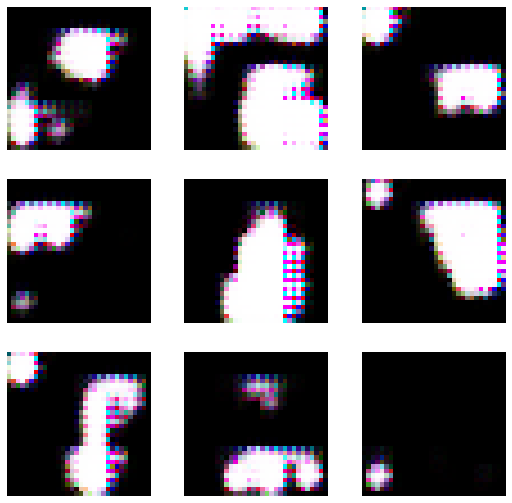

In [93]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총20회

In [94]:
lrnr.fit(10)

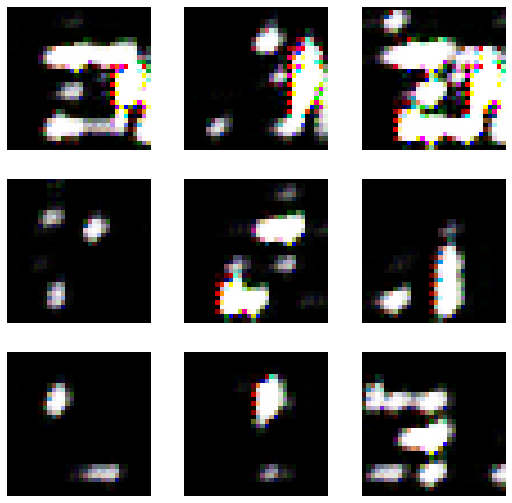

In [95]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총30회

In [96]:
lrnr.fit(10)

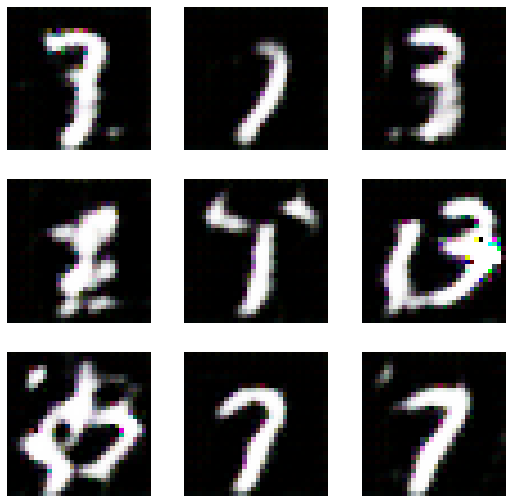

In [97]:
lrnr.show_results()

`-` lrnr.fit(10) 추가로 진행 // 총 60회

In [98]:
lrnr.fit(30)

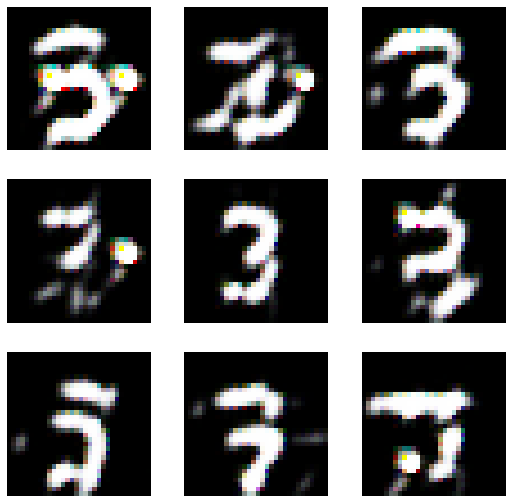

In [99]:
lrnr.show_results()

### 4단계 (없음)